General setup:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now load all datasets.

Currently there are '3.5' runs. I made 5 runs, but one had a channel failing and on the last one I changed the electrode pins so we will see if this is useful at all.

In [2]:
filenames = 'data/run{}.csv'
datasets = []
for i in range(5):
    data = np.genfromtxt(filenames.format(i), delimiter=', ', comments='#')
    # first line is always header
    data = data[1:]
    datasets.append(data)

Every set has 10 batches of 20 uniformly distributed points and 5 callibration points in the center and the four corners.

In [3]:
current = (-1,-1)
points = []

for data in datasets:
    for t in range(data.shape[0]):
        point = data[t, (9,10)]
        if any(point != current):
            points.append(point)
            current = point

calibration_points = [
    (50, 50),
    (2510, 50),
    (50, 1390),
    (2510, 1390),
    (1280, 720)
]

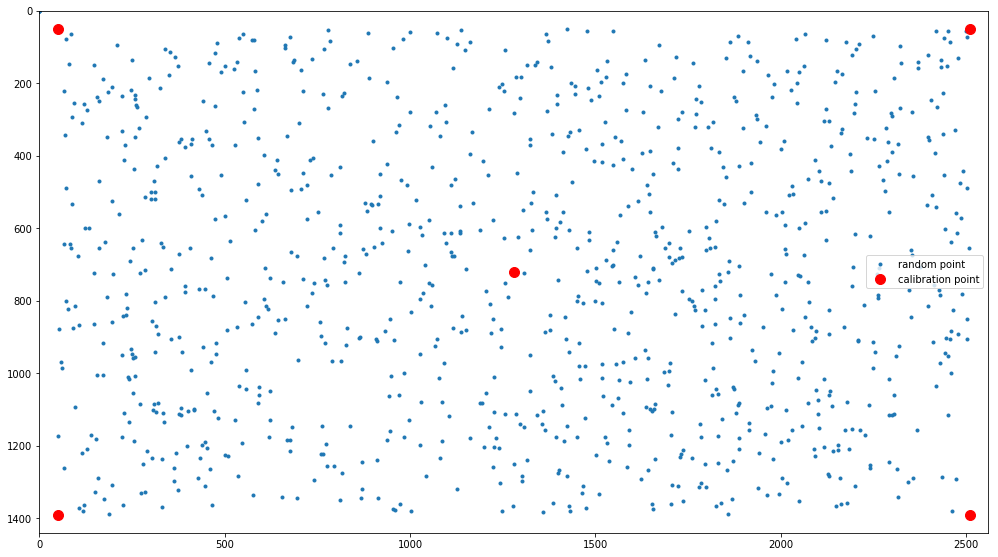

In [4]:
plt.figure(figsize=(17, 9.6))
plt.plot(*zip(*points), '.', label='random point')
plt.plot(*zip(*calibration_points), '.r', markersize=20, label='calibration point')
plt.xlim(0, 2560)
plt.ylim(1440, 0)
plt.legend()

Let's  have a look at the data from the first run

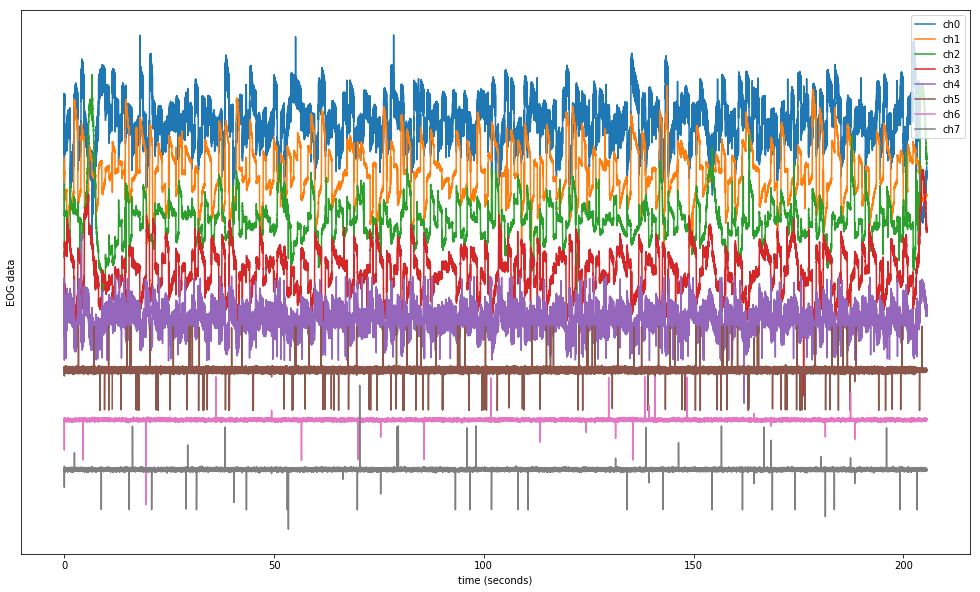

In [5]:
data = datasets[0]
raw_times = data[:, 0].copy()
eog = data[:, 1:9].copy()
coords = data[:, 10:].copy()

times = (raw_times - raw_times[0])
threshold = 1000
eog[np.abs(eog) > threshold] = np.nan

offset = 300
plt.figure(figsize=(17, 10))
for i in range(8):
    plt.plot(times, eog[:,i] - i*offset, label='ch{}'.format(i))
plt.legend()
plt.xlabel('time (seconds)')
plt.yticks([], [])
plt.ylabel('EOG data')